In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Chargement de base PRC

In [38]:
df=pd.read_excel("Data_Breach_Chronology_sample.xlsx")

In [39]:
df.columns

Index(['id', 'source', 'org_name', 'acceptable_names', 'org_name_explanation',
       'reported_date', 'breach_date', 'end_breach_date', 'incident_details',
       'date_info_explanation', 'information_affected',
       'information_affected_explanation', 'organization_type',
       'organization_type_explanation', 'breach_type',
       'breach_type_explanation', 'group_uuid', 'normalized_org_name',
       'normalized_org_name_explanation', 'group_org_breach_type',
       'group_org_breach_type_explanation', 'group_org_type',
       'group_org_type_explanation', 'total_affected', 'residents_affected',
       'impact_info_explanation', 'breach_location_street',
       'breach_location_city', 'breach_location_state', 'breach_location_zip',
       'breach_location_country', 'breach_location_explanation', 'tags',
       'source_url', 'notification_url_original', 'created_at', 'updated_at'],
      dtype='object')

## Traitement de données 

In [40]:

variables = [
    "id",
    "organization_type",
    "incident_details",
    "breach_type",
    "reported_date",
    "breach_date",
    "end_breach_date",
    "total_affected",
    "residents_affected",
    "breach_location_city",
    "breach_location_state",
    "breach_location_country"
]
df=df[variables]

In [43]:
df.dtypes

id                         object
organization_type          object
incident_details           object
breach_type                object
reported_date              object
breach_date                object
end_breach_date            object
total_affected             object
residents_affected         object
breach_location_city       object
breach_location_state      object
breach_location_country    object
dtype: object

In [ ]:

df_filtré = df[df['total_affected'] != 'UNKN']
df_filtré=df_filtré[df_filtré['breach_date'] != 'UNKN']
df_filtré['breach_date'] = pd.to_datetime(df_filtré['breach_date'], errors='coerce')
df_filtré['total_affected'] = pd.to_numeric(df_filtré['total_affected'], errors='coerce')

In [55]:
df_filtré.head(4)

,id,organization_type,incident_details,breach_type,reported_date,breach_date,end_breach_date,total_affected,residents_affected,breach_location_city,breach_location_state,breach_location_country
0,9e38b3ea-ae63-5d83-aaed-73952834000f,EDU,The Indiana Office of the Attorney General rep...,UNKN,2020-10-30,2019-12-01,UNKN,1976,11,UNKN,UNKN,UNKN
1,3baa552d-66af-5371-b32e-05aa3c540031,BSF,"On February 25, 2021, the Maryland Office of t...",HACK,2021-02-25,2020-12-21,2020-12-21,383,383,Towson,MD,United States
5,01b836ca-bdc7-5eda-b4af-94962b50beda,UNKN,The Indiana Office of the Attorney General rep...,UNKN,2017-11-15,2017-08-11,UNKN,1376,13,UNKN,UNKN,UNKN
8,bcf02ac1-8d9f-56bf-b588-b7ca0c5d116c,MED,The Indiana Office of the Attorney General rep...,UNKN,2021-04-08,2020-02-03,UNKN,24037,566,UNKN,UNKN,UNKN


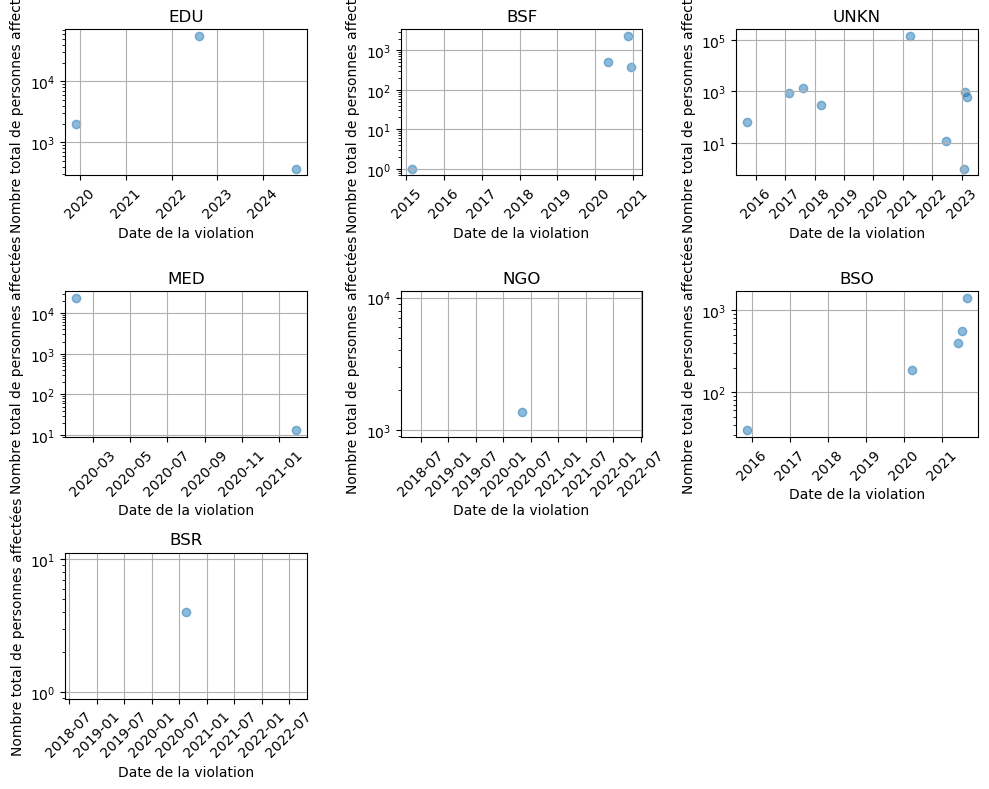

In [56]:


# Conversion de la date
df_filtré['breach_date'] = pd.to_datetime(df_filtré['breach_date'])

# Liste des types d'organisation uniques
unique_org_types = df_filtré['organization_type'].unique()

# Définir la grille : 3 lignes, 3 colonnes
nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8), sharex=False)

# Aplatir les axes pour itérer facilement
axes = axes.flatten()

# Tracer chaque sous-graphe
for i, org_type in enumerate(unique_org_types):
    ax = axes[i]
    subset = df_filtré[df_filtré['organization_type'] == org_type]
    ax.scatter(subset['breach_date'], subset['total_affected'], alpha=0.5)
    ax.set_yscale('log')
    ax.set_title(org_type)
    ax.set_xlabel('Date de la violation')
    ax.set_ylabel('Nombre total de personnes affectées')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)  # Rotation des dates pour lisibilité

# Supprimer les axes inutilisés s'il y a moins de 9 types
for j in range(len(unique_org_types), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [57]:
# Analyse du nombre de personnes affectées

# Statistiques descriptives pour la variable 'total_affected'
stats = df_filtré['total_affected'].describe()

print(stats)

count        31.000000
mean       7551.967742
std       26763.925560
min           1.000000
25%          44.500000
50%         383.000000
75%        1168.500000
max      140000.000000
Name: total_affected, dtype: float64


La moyenne est très décalée par rapport à la médiane ce qui montre que notre variable qui évalue la sévérité d'une attaque cyber est à queue lourde. Le graphique qui suite conforte bien nos observations :

In [ ]:
# Analyse du nombre d'incidences en fonction du type d'organisation touchée

<Axes: >

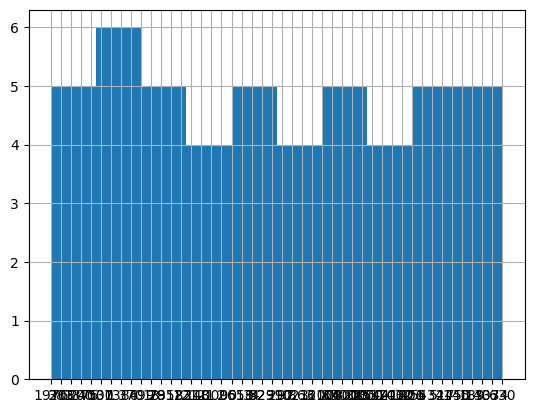

In [26]:
df_filtré['total_affected'].hist()

In [12]:
len(df)

100

<Axes: >

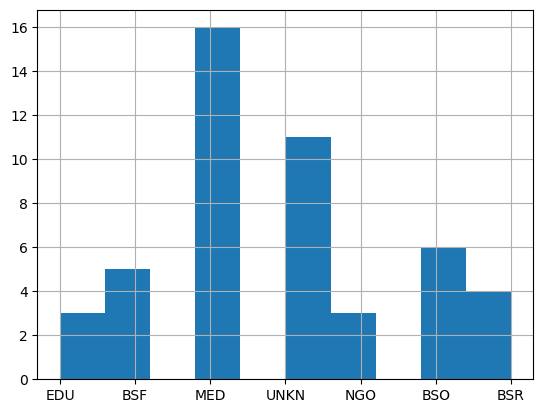

In [28]:
df_filtré['organization_type'].hist()

<Axes: >

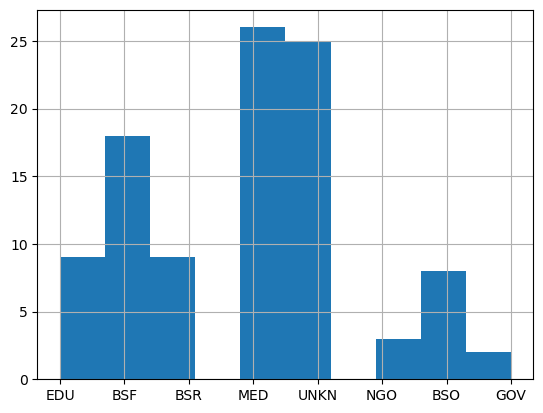

In [15]:
df['organization_type'].hist()